# SPARK CONTEXT Y SQLCONTEXT

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [2]:
sc

In [3]:
sqlContext = pyspark.sql.SQLContext(sc)

In [4]:
sqlContext

# CARGA DE DATASETS

In [26]:
df = sqlContext.read.format("com.databricks.spark.csv").option("header", "true")\
                .option("inferschema", "true").option("mode","DROPMALFORMED").option("delimiter", ",")\
                .load("titanic1.csv")

In [27]:
df.count()

891

In [29]:
df.dtypes

[('PassengerId', 'int'),
 ('Survived', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [30]:
df.sort('PassengerId').show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [31]:
df2 = sqlContext.read.format("com.databricks.spark.csv").option("header", "true")\
                .option("inferschema", "true").option("mode","DROPMALFORMED").option("delimiter", ",")\
                .load("titanic2.csv")

In [32]:
df2.sort('PassengerId').show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0|          330911| 7.8292| null|       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|          363272|    7.0| null|       S|
|        894|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|          240276| 9.6875| null|       Q|
|        895|     3|    Wirz, Mr. Albert|  male|27.0|    0|    0|          315154| 8.6625| null|       S|
|        896|     3|Hirvonen, Mrs. Al...|female|22.0|    1|    1|         3101298|12.2875| null|       S|
|        897|     3|Svensson, Mr. Joh...|  male|14.0|    0|    0|            7538|  9.225| null|       S|
|        898|     3|Connolly, Miss. Kate|femal

# UNIR LOS DOS DATAFRAMES

In [33]:
df = df.drop('Survived')

In [34]:
df.dtypes

[('PassengerId', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [35]:
data = df.union(df2)

In [36]:
data.count()

1309

# GUARDAR EN PARQUET Y LEER DE PARQUET

In [46]:
data.write.parquet('data/titanic.parquet')

In [49]:
new_data = sqlContext.read.parquet('data/titanic.parquet')
new_data.dtypes

[('PassengerId', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [50]:
new_data.count()

1309

# ANALISIS DE DATOS

# OBTENER EL TOTAL DE PASAJEROS POR SEXO

In [56]:
new_data.groupby('Sex').count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  466|
|  male|  843|
+------+-----+



# OBTENER EL TOTAL DE PASAJEROS POR CLASE EN EL PASAJE

In [57]:
new_data.groupby('Pclass').count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  323|
|     3|  709|
|     2|  277|
+------+-----+



# OBTENER UN DATAFRAME CON LOS PASAJEROS POR EDAD

In [51]:
new_data.groupby('Age').count().sort('Age').show()

+----+-----+
| Age|count|
+----+-----+
|null|  263|
|0.17|    1|
|0.33|    1|
|0.42|    1|
|0.67|    1|
|0.75|    3|
|0.83|    3|
|0.92|    2|
| 1.0|   10|
| 2.0|   12|
| 3.0|    7|
| 4.0|   10|
| 5.0|    5|
| 6.0|    6|
| 7.0|    4|
| 8.0|    6|
| 9.0|   10|
|10.0|    4|
|11.0|    4|
|11.5|    1|
+----+-----+
only showing top 20 rows



# OBTENER LA EDAD MEDIA DEL PASAJE

In [54]:
new_data.describe('Age').show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1046|
|   mean|29.881137667304014|
| stddev| 14.41349321127132|
|    min|              0.17|
|    max|              80.0|
+-------+------------------+



# CREAR UN NUEVO DATAFRAME CON LOS NOMBRES Y CÓDIGOS DE LOS PUERTOS

In [ ]:
C = Cherbourg, Q = Queenstown, S = Southampton

In [61]:
d = [{'Port_code': 'C', 'Port': 'Cherbourg'},
     {'Port_code': 'Q', 'Port': 'Queenstown'},
     {'Port_code': 'S', 'Port': 'Southampton'}]
a = sqlContext.createDataFrame(d)

/usr/local/spark/python/pyspark/sql/session.py:316: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [62]:
type(a)

pyspark.sql.dataframe.DataFrame

In [63]:
a.show()

+-----------+---------+
|       Port|Port_code|
+-----------+---------+
|  Cherbourg|        C|
| Queenstown|        Q|
|Southampton|        S|
+-----------+---------+



In [80]:
data = new_data.join(a, new_data.Embarked == a.Port_code, 'inner').drop('Port_code','Embarked')

In [81]:
data.dtypes

[('PassengerId', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Port', 'string')]

# OBTENER EL TOTAL DE PASAJEROS QUE HA EMBARCADO EN CADA PUERTO

In [82]:
df4.groupby('Port').count().show()

+-----------+-----+
|       Port|count|
+-----------+-----+
| Queenstown|  123|
|Southampton|  914|
|  Cherbourg|  270|
+-----------+-----+



# ALGUNAS REPRESENTACIONES GRÁFICAS

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
data_pd = data.toPandas()

# HISTOGRAMA DEL TOTAL DE PASAJEROS POR SEXO

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


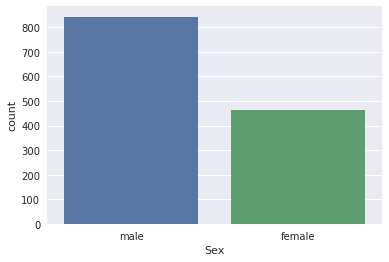

In [92]:
sns.countplot(x='Sex',data=data_pd)

# DISTRIBUCIÓN EN BOXPLOT DE LOS PASAJEROS POR CLASE Y EDAD

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


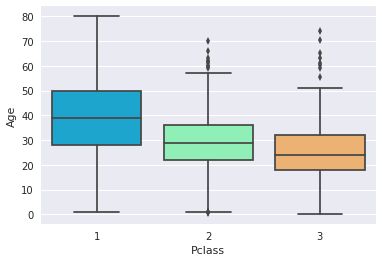

In [90]:
sns.boxplot(x='Pclass',y='Age',data =data_pd,palette='rainbow')

# DISTRIBUCIÓN EN VIOLINPLOT DE LOS PASAJEROS POR CLASE Y EDAD

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


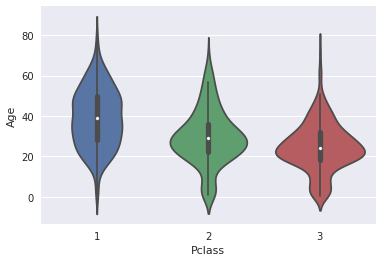

In [99]:
sns.violinplot(x='Pclass',y='Age',data=data_pd)

# DOS HISTOGRAMAS CON LA DISTRIBUCIÓN DE PASAJEROS POR EDAD, SEPARADOS POR SEXO

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


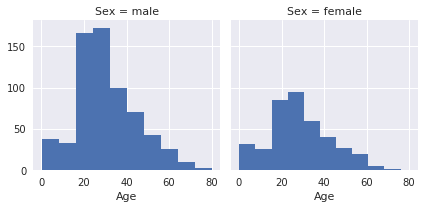

In [96]:
g = sns.FacetGrid(data=data_pd,col='Sex')
g.map(plt.hist,'Age')